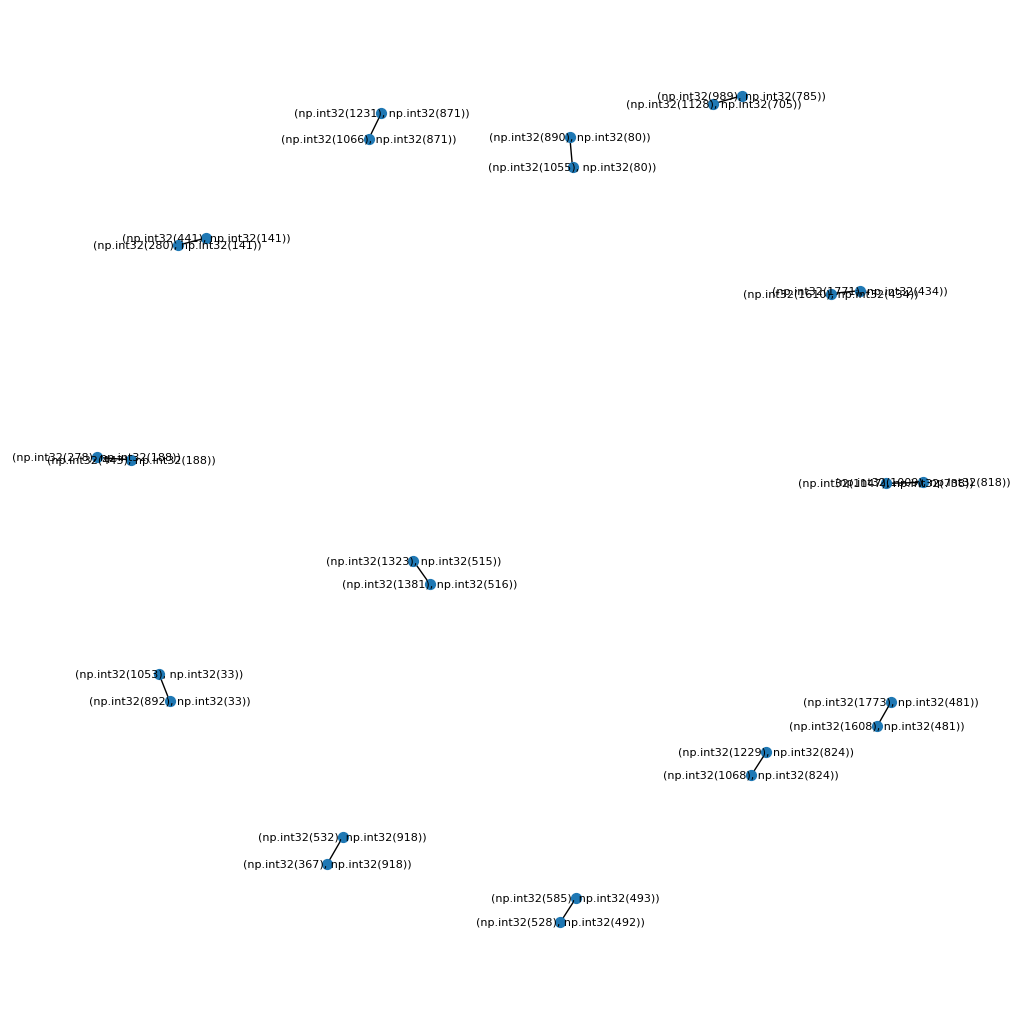

In [3]:
import cv2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('images/jfk1.png', cv2.IMREAD_GRAYSCALE)

# Preprocessing: Binarization
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Edge detection
edges = cv2.Canny(binary, 50, 150, apertureSize=3)

# Line detection using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10)

# Initialize graph
G = nx.Graph()

# Feature extraction and graph construction
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        G.add_node((x1, y1))
        G.add_node((x2, y2))
        G.add_edge((x1, y1), (x2, y2))

# Visualize graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=50, font_size=8)
plt.show()

In [1]:
import networkx as nx
import osmnx as ox
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
ox.__version__

'1.9.4'

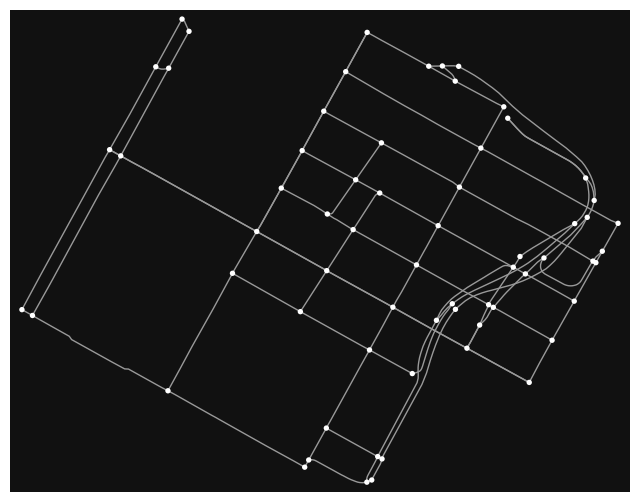

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64))

In [2]:
# download/model a street network for some city then visualize it
G_hy = ox.graph_from_place("Hudson Yards, New York, USA", network_type="drive")
strong = sorted(nx.strongly_connected_components(G_hy), key=len, reverse=True)
G_hy_s = nx.convert_node_labels_to_integers(G_hy.subgraph(strong[0]))
fig, ax = ox.plot_graph(G_hy_s)

coords = [(G_hy_s.nodes[x]['x'],(G_hy_s.nodes[x]['y'])) for x in range(len(G_hy_s.nodes))]
min_max_scaler = MinMaxScaler()
coords_scaled = min_max_scaler.fit_transform(coords)
for i in range(len(G_hy_s.nodes)):
    G_hy_s.nodes[i]['scaled_x'], G_hy_s.nodes[i]['scaled_y'] = coords_scaled[i,0],coords_scaled[i,1]
    
G_hy_s.nodes

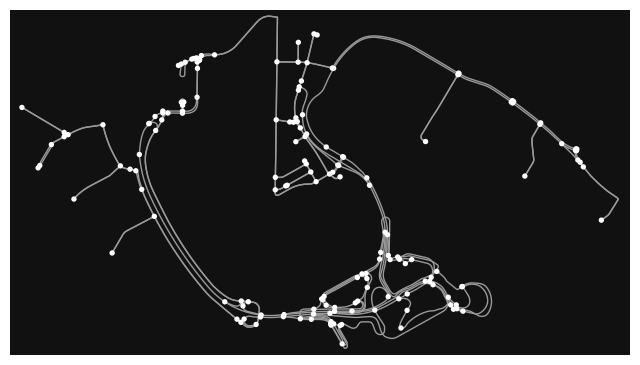

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169))

In [2]:
# download/model a street network for some city then visualize it
G_hy = ox.graph_from_place("John F Kennedy International Airport, New York, USA", network_type="drive")
strong = sorted(nx.strongly_connected_components(G_hy), key=len, reverse=True)
G_hy_s = nx.convert_node_labels_to_integers(G_hy.subgraph(strong[0]))
fig, ax = ox.plot_graph(G_hy_s)

coords = [(G_hy_s.nodes[x]['x'],(G_hy_s.nodes[x]['y'])) for x in range(len(G_hy_s.nodes))]
min_max_scaler = MinMaxScaler()
coords_scaled = min_max_scaler.fit_transform(coords)
for i in range(len(G_hy_s.nodes)):
    G_hy_s.nodes[i]['scaled_x'], G_hy_s.nodes[i]['scaled_y'] = coords_scaled[i,0],coords_scaled[i,1]
    
G_hy_s.nodes

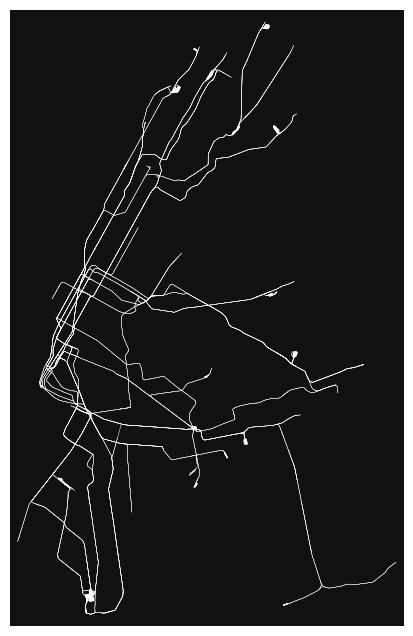

In [4]:
# get NY subway rail network
G = ox.graph_from_place(
    "New York, New York, USA",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"~"subway"]',
)

fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

In [10]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

6662931.184573982

In [11]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 208,
 'm': 356,
 'k_avg': 3.423076923076923,
 'edge_length_total': 67904.897,
 'edge_length_avg': 190.7440926966292,
 'streets_per_node_avg': 2.8798076923076925,
 'streets_per_node_counts': {0: 0, 1: 23, 2: 6, 3: 153, 4: 25, 5: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.11057692307692307,
  2: 0.028846153846153848,
  3: 0.7355769230769231,
  4: 0.1201923076923077,
  5: 0.004807692307692308},
 'intersection_count': 185,
 'street_length_total': 55336.579,
 'street_segment_count': 293,
 'street_length_avg': 188.86204436860066,
 'circuity_avg': 1.1604108457343365,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 130,
 'node_density_km': 31.217491857271703,
 'intersection_density_km': 27.765557661515697,
 'edge_density_km': 10191.445044069103,
 'street_density_km': 8305.14040548929,
 'clean_intersection_density_km': 19.510932410794815}

In [12]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

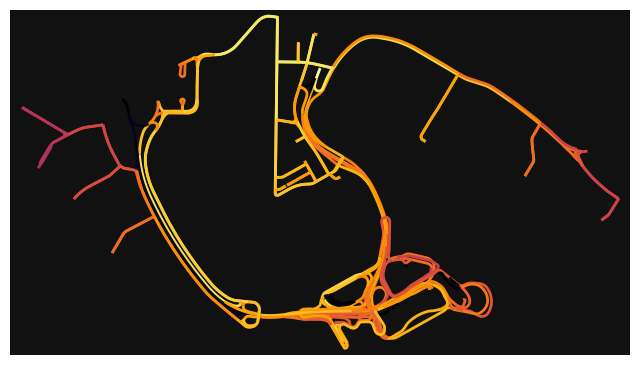

In [13]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

In [80]:
import networkx as nx
import random
import matplotlib.pyplot as plt

class Target:
    def __init__(self, node, value):
        self.node = node
        self.value = value

class Player:
    def __init__(self, name, start_node):
        self.name = name
        self.current_node = start_node
        self.path = [start_node]  # Track the path taken
    
    def move(self, new_node):
        self.current_node = new_node
        self.path.append(new_node)

class Attacker(Player):
    def __init__(self, name, start_node):
        super().__init__(name, start_node)

    def choose_target(self, targets):
        # Simple heuristic: pick the target with the highest value
        target = max(targets, key=lambda t: t.value)
        return target

class Defender(Player):
    def __init__(self, name, start_node, capture_radius):
        super().__init__(name, start_node)
        self.capture_radius = capture_radius
    
    def is_attacker_caught(self, attacker):
        # Check if attacker is within capture radius
        path_length = nx.shortest_path_length(game.graph, source=self.current_node, target=attacker.current_node)
        return path_length <= self.capture_radius

class SecurityGame:
    def __init__(self, graph, attacker, defender, targets, num_timesteps, allow_wait=True):
        self.graph = graph
        self.attacker = attacker
        self.defender = defender
        self.targets = targets
        self.num_timesteps = num_timesteps
        self.allow_wait = allow_wait
        # Extract positions from node attributes 'x' and 'y' (longitude and latitude)
        # self.pos = {node: (data['x'], data['y']) for node, data in self.graph.nodes(data=True)}
        # self.pos = {node: (data['scaled_x'], data['scaled_y']) for node, data in self.graph.nodes(data=True)}

        
        # Get the range of x and y coordinates for setting axis limits
        # x_values = [coord[0] for coord in self.pos.values()]
        # y_values = [coord[1] for coord in self.pos.values()]
        # self.x_min, self.x_max = min(x_values), max(x_values)
        # self.y_min, self.y_max = min(y_values), max(y_values)

    def generate_strategy_matrix(self, player_type):
        """
        Generates a strategy matrix for the given player (Attacker or Defender).

        Parameters:
        - player_type: "attacker" or "defender"

        Returns:
        - strategy_matrix: 2D numpy array where each row represents a possible path.
        """
        num_timesteps = self.num_timesteps
        all_paths = []
        
        if player_type == "attacker":
            player = self.attacker
        elif player_type == "defender":
            player = self.defender
        else:
            raise ValueError("Invalid player_type. Choose 'attacker' or 'defender'.")

        start_node = player.current_node

        # Recursive DFS function to generate all possible paths
        def dfs(current_node, path):
            if len(path) == num_timesteps:
                all_paths.append(path)
                return

            # Option to wait at the current node, controlled by allow_wait parameter
            if self.allow_wait:
                dfs(current_node, path + [current_node])

            # Move to neighboring nodes
            neighbors = list(self.graph.neighbors(current_node))

            if neighbors:
                for neighbor in neighbors:
                    dfs(neighbor, path + [neighbor])

        # Initialize DFS from the player's starting node
        dfs(start_node, [start_node])

        # Convert list of paths to a numpy array
        strategy_matrix = np.array(all_paths)

        return strategy_matrix

    def visualize_game_state(self, timestep):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_title(f"Game State at Timestep {timestep + 1}")
        
        # Set axis limits to zoom in on the graph
        ax.set_xlim(self.x_min - 0.05, self.x_max + 0.05)
        ax.set_ylim(self.y_min - 0.05, self.y_max + 0.05)
        
        # Draw nodes and edges with the real-world positions
        nx.draw(self.graph, pos=self.pos, ax=ax, node_color="lightgrey", node_size=100)
        nx.draw_networkx_labels(self.graph, pos=self.pos, font_size=8)

        
        # Mark target nodes with value annotations
        for target in self.targets:
            nx.draw_networkx_nodes(self.graph, pos=self.pos, nodelist=[target.node], node_color="yellow", node_size=100, ax=ax)
            # Adjust the target value annotations to be slightly off the side of the node
            offset = 0.005  # Slight offset to avoid overlap (adjust based on scale)
            x, y = self.pos[target.node]
            ax.annotate(f"{target.value}", xy=(x + offset, y + offset), fontsize=5, ha='center', va='center', color='black')

        # Draw paths for attacker and defender
        nx.draw_networkx_edges(self.graph, pos=self.pos, edgelist=list(zip(self.attacker.path[:-1], self.attacker.path[1:])), ax=ax, edge_color="red", width=2.0)
        nx.draw_networkx_edges(self.graph, pos=self.pos, edgelist=list(zip(self.defender.path[:-1], self.defender.path[1:])), ax=ax, edge_color="blue", width=2.0)

        # Draw attacker and defender positions
        nx.draw_networkx_nodes(self.graph, pos=self.pos, nodelist=[self.attacker.current_node], node_color="red", node_size=100, ax=ax, label="Attacker")
        nx.draw_networkx_nodes(self.graph, pos=self.pos, nodelist=[self.defender.current_node], node_color="blue", node_size=100, ax=ax, label="Defender")
        
        # Highlight the target the attacker is moving towards
        target = self.attacker.choose_target(self.targets)
        nx.draw_networkx_nodes(self.graph, pos=self.pos, nodelist=[target.node], node_color="green", node_size=100, ax=ax, label="Current Target")
        
        # Define a custom legend to show attacker and defender paths, targets, and current target
        handles = [
            plt.Line2D([], [], color='red', label='Attacker Path', linewidth=2),
            plt.Line2D([], [], color='blue', label='Defender Path', linewidth=2),
            plt.Line2D([], [], marker='o', color='yellow', label='Targets', markersize=10, linestyle='None'),
            plt.Line2D([], [], marker='o', color='green', label='Current Target', markersize=10, linestyle='None')
        ]
        ax.legend(handles=handles)
        
        plt.show()
    
    def play_game(self):
        for timestep in range(self.num_timesteps):
            print(f"--- Timestep {timestep + 1} ---")
            
            # Attacker chooses a target
            target = self.attacker.choose_target(self.targets)
            print(f"Attacker is moving towards target at node {target.node} with value {target.value}.")
            
            # Simple movement logic (1 step towards the target)
            path = nx.shortest_path(self.graph, source=self.attacker.current_node, target=target.node)
            if len(path) > 1:
                self.attacker.move(path[1])
            print(f"Attacker moved to node {self.attacker.current_node}.")
            
            # Defender moves (simple random walk for now)
            possible_moves = list(self.graph.neighbors(self.defender.current_node))
            if possible_moves:
                self.defender.move(random.choice(possible_moves))
            print(f"Defender moved to node {self.defender.current_node}.")
            
            # Visualize the current state of the game at each timestep
            self.visualize_game_state(timestep)
            
            # Check if defender catches the attacker
            if self.defender.is_attacker_caught(self.attacker):
                print("Defender caught the attacker!")
                break
            
            # Check if attacker reached the target
            if self.attacker.current_node == target.node:
                print(f"Attacker reached the target and gains {target.value} points!")
                break
    def play_game_with_strategies(self, attacker_path, defender_path):
        """
        Simulates the game using the provided attacker and defender paths, returning the game outcome.
        
        Parameters:
        - attacker_path: list of nodes the attacker will move along.
        - defender_path: list of nodes the defender will move along.
        
        Returns:
        - game_score: int, the zero-sum score of the game.
        """
        # Initialize game score
        game_score = 0
        targets_hit = set()
        targets_dict = {t.node : t.value for t in self.targets}
    
        # Run the game for self.num_timesteps
        for t in range(self.num_timesteps):
            # Get attacker and defender positions at timestep t
            attacker_position = attacker_path[t] if t < len(attacker_path) else attacker_path[-1]
            defender_position = defender_path[t] if t < len(defender_path) else defender_path[-1]
    
            # Check if the attacker is within the defender's capture radius
            # We use the shortest path distance to calculate proximity between nodes
            distance = nx.shortest_path_length(self.graph, source=defender_position, target=attacker_position)
            if distance <= self.defender.capture_radius:
                # Return the current score and break when interdiction occurs
                return game_score
    
            # Check if the attacker reaches a target and add its value to the score
            if attacker_position in targets_dict and attacker_position not in targets_hit:
                game_score += -targets_dict[attacker_position]  # Add target value (negative for attacker)
                targets_hit.add(attacker_position)
    
        # If the attacker reaches multiple targets without being interdicted, the score is additive
        return game_score

    def generate_utility_matrix(self):
        """
        Generates the utility matrix by evaluating all combinations of attacker and defender strategies.
        
        Returns:
        - utility_matrix: 2D numpy array where entry [i,j] is the outcome of defender strategy i vs attacker strategy j.
        """
        # Generate strategy matrices for both players
        defender_strategies = self.generate_strategy_matrix("defender")
        attacker_strategies = self.generate_strategy_matrix("attacker")

        # Initialize utility matrix
        num_defender_strategies = defender_strategies.shape[0]
        num_attacker_strategies = attacker_strategies.shape[0]
        utility_matrix = np.zeros((num_defender_strategies, num_attacker_strategies))

        # Loop through all strategy combinations
        for i in range(num_defender_strategies):
            defender_path = defender_strategies[i]
            for j in range(num_attacker_strategies):
                attacker_path = attacker_strategies[j]

                # Simulate the game and store the outcome in the utility matrix
                game_score = self.play_game_with_strategies(attacker_path, defender_path)
                utility_matrix[i, j] = game_score

        return utility_matrix

    def plot_initial_game_state(self):
        """
        Plots the initial game state showing the graph, player start locations, 
        and target node information without any player paths. Supports both 
        real-world graphs with 'x', 'y' node attributes and simple grid graphs 
        from nx.grid_2d_graph.
        """
        plt.figure(figsize=(8, 6))
    
        # Check if the graph has 'x', 'y' node attributes for positioning
        if 'x' in next(iter(self.graph.nodes(data=True)))[1] and 'y' in next(iter(self.graph.nodes(data=True)))[1]:
            # Use 'x' and 'y' node attributes for positioning
            pos = {node: (self.graph.nodes[node]['x'], self.graph.nodes[node]['y']) for node in self.graph.nodes}
        else:
            # For a grid graph, use the default layout from node labels (tuples like (i, j))
            if isinstance(next(iter(self.graph.nodes)), tuple) and len(next(iter(self.graph.nodes()))) == 2:
                pos = {node: node for node in self.graph.nodes}  # Use (i, j) tuple directly as the position
            else:
                # Fallback to spring layout if no positional info is available
                pos = nx.spring_layout(self.graph)
    
        # Draw the graph
        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, 
                font_color='black', font_weight='bold', edge_color='gray')
    
        # Extract target nodes and their values from the target objects
        target_nodes = [target.node for target in self.targets]
        target_values = [target.value for target in self.targets]
    
        # Draw the target nodes (yellow) and label them with their values
        nx.draw_networkx_nodes(self.graph, pos, nodelist=target_nodes, node_color='yellow', node_size=600)
        
        # Add labels for target node values slightly offset from the node labels
        for i, node in enumerate(target_nodes):
            target_value = target_values[i]
            plt.text(pos[node][0] + 0.05, pos[node][1] + 0.05, f"V={target_value}", fontsize=10, fontweight='bold', color='red')
    
        # Mark attacker and defender starting positions with different colors
        nx.draw_networkx_nodes(self.graph, pos, nodelist=[self.attacker.current_node], node_color='red', node_size=700, label='Attacker Start')
        nx.draw_networkx_nodes(self.graph, pos, nodelist=[self.defender.current_node], node_color='blue', node_size=700, label='Defender Start')
        
        # Add legend for player start locations
        # plt.legend(["Attacker Start", "Defender Start", "Target"], loc='upper right')
        plt.legend(loc='upper right')
    
        plt.title("Initial Game State (Player Starts and Target Values)")
        plt.show()
# Sample graph creation
# G = nx.grid_2d_graph(4, 4)  # A simple 5x5 grid graph
# G = nx.convert_node_labels_to_integers(G)

# Initialize targets randomly
# targets = [Target(node, random.randint(1, 10)) for node in random.sample(list(G_hy_s.nodes), 5)]
# # targets = [Target(node, random.randint(1, 10)) for node in random.sample(list(G.nodes), 5)]


# # Initialize players
# attacker = Attacker(name="Attacker", start_node=6)
# defender = Defender(name="Defender", start_node=15, capture_radius=1)

# # Initialize and play the game with visualization
# game = SecurityGame(graph=G_hy_s, attacker=attacker, defender=defender, targets=targets, num_timesteps=4, force_move=True)
# # game = SecurityGame(graph=G, attacker=attacker, defender=defender, targets=targets, num_timesteps=5, force_move=True)

# print(game.generate_strategy_matrix("attacker"))
# game.play_game()



In [ ]:
import numpy
import sys
numpy.set_printoptions(threshold=sys.maxsize)

G = nx.grid_2d_graph(3, 3)  # A simple 5x5 grid graph
G = nx.convert_node_labels_to_integers(G)
print("------NODES-------")
print(G.nodes)

# targets = [Target(node, random.randint(1, 10)) for node in random.sample(list(G_hy_s.nodes), 5)]
targets = [Target(node, random.randint(1, 10)) for node in random.sample(list(G.nodes), 3)]
print("------TARGETS (Node, Value)-------")
print([(t.node,t.value) for t in targets])

attacker = Attacker(name="Attacker", start_node=0)
defender = Defender(name="Defender", start_node=8, capture_radius=1)
game = SecurityGame(graph=G, attacker=attacker, defender=defender, targets=targets, num_timesteps=4, allow_wait=False)
# game = SecurityGame(graph=G_hy_s, attacker=attacker, defender=defender, targets=targets, num_timesteps=7)
print("------ATTACKER STRATEGY MATRIX-------")
print(game.generate_strategy_matrix("attacker"))
print("------DEFENDER STRATEGY MATRIX-------")
print(game.generate_strategy_matrix("defender"))
utility_matrix = game.generate_utility_matrix()
max_index = np.argmin(utility_matrix)
max_coordinates = np.unravel_index(max_index, utility_matrix.shape)
print("------UTILITY MATRIX MAX COORDS-------")
# print(max_coordinates)
print(utility_matrix)
game.plot_initial_game_state()

attacker_strategies = game.generate_strategy_matrix("attacker")
defender_strategies = game.generate_strategy_matrix("defender")

# for i in range((defender_strategies.shape[0])):
#     for j in range((attacker_strategies.shape[0])):
#         print(defender_strategies[i],attacker_strategies[j])
#         print(utility_matrix[i,j])

In [87]:
len(defender_strategies)

16

In [58]:
defender_strategies[13]

array([15, 11, 10,  9,  5])

In [60]:
utility_matrix[0,11]

-16.0